# Projeto 1 - Ciência dos Dados

Nome: Gustavo Pinheiro de Carvalho

Nome: Maria Eduarda Matta Mercer Mourão

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [44]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gustavopinheiro/P1-CD21-1


### Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [76]:
filename = 'Xiaomi.xlsx'

In [77]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Classificação
0,@baixinho04 xiaomi seria uma boa opção. eu ten...,1.0
1,"ainda bem q tenho xiaomi e ele tá cm 73%, dura...",0.0
2,@tetenc555 @naegiwcat eu vó compra um xiaomi r...,0.0
3,@10icarocaldas por esse preço tu comprar o xia...,0.0
4,vcs que tem xiaomi sabiam que dá p/ usar o you...,0.0


In [78]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Classificação
0,"@luffyoficial_ entt amg, omo eu ainda não ten...",0
1,a xiaomi me prometeu qualidade,0
2,algum sugar daddy on pra me dar o robo aspirad...,0
3,"@xiaomibrasil me salva aí, xiaomi com os bugs....",0
4,meu celular ja ta em fim de carreira n vejo a ...,0


### Definindo as variáveis qualitativas como categóricas

#### Treinamento

In [89]:

train.Classificação = train.Classificação.astype('category')
train.Classificação.cat.categories = ('Não relevante', 'Relevante')
train.head(10)

,Treinamento,Classificação
0,@baixinho04 xiaomi seria uma boa opção. eu ten...,Relevante
1,"ainda bem q tenho xiaomi e ele tá cm 73%, dura...",Não relevante
2,@tetenc555 @naegiwcat eu vó compra um xiaomi r...,Não relevante
3,@10icarocaldas por esse preço tu comprar o xia...,Não relevante
4,vcs que tem xiaomi sabiam que dá p/ usar o you...,Não relevante
5,@10icarocaldas xiaomi é o melhor celular custo...,Relevante
6,"@_lucast7 @g1 verdade, mas pelo menos o preço ...",Não relevante
7,a xiaomi lançou um celular com a acabamento em...,Não relevante
8,@mathmj @madunixs @affectionmauro xiaomi alem ...,Relevante
9,@nn_carvalhosa @g1 no caso da xiaomi o consumi...,Não relevante


#### Teste

In [90]:
test.Classificação = test.Classificação.astype('category')
test.Classificação.cat.categories = ('Não relevante', 'Relevante')
test.head(10)

,Teste,Classificação
0,"@luffyoficial_ entt amg, omo eu ainda não ten...",Não relevante
1,a xiaomi me prometeu qualidade,Não relevante
2,algum sugar daddy on pra me dar o robo aspirad...,Não relevante
3,"@xiaomibrasil me salva aí, xiaomi com os bugs....",Não relevante
4,meu celular ja ta em fim de carreira n vejo a ...,Não relevante
5,a xiaomi mi band 6 estará mesmo a chegar?\nhtt...,Não relevante
6,xiaomi não decepciona em nada 👏,Relevante
7,@wos4you vai ser o mesmo lugar q eu vou mandar...,Não relevante
8,@kaiiirtss xiaomi sksksks,Não relevante
9,@jopedrobf gastou dinheiro atoa... a não ser q...,Não relevante


### Estudo dos valores e quantidades de tweets de cada classificação

#### Treinamento

In [91]:
train.Classificação.value_counts(True)

Não relevante    0.732441
Relevante        0.267559
Name: Classificação, dtype: float64

In [92]:
train_classificacao = train.Classificação.value_counts()
i=0
for title, var_quanti in (('Não relevante', train_classificacao[0]), ('Relevante', train_classificacao[1])):
    print('-' * 5 * len(title))
    print(title)
    print('-' * 5 * len(title))
    print(f'contagem               = {train_classificacao[i]}')
    i += 1

-----------------------------------------------------------------
Não relevante
-----------------------------------------------------------------
contagem               = 219
---------------------------------------------
Relevante
---------------------------------------------
contagem               = 80


##### Gráfico

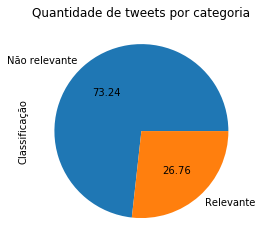

In [93]:
train_classificacao = train.Classificação.value_counts()
train_classificacao.plot(kind='pie', title='Quantidade de tweets por categoria', autopct="%.2f")

#### Teste

In [94]:
test.Classificação.value_counts(True)

Não relevante    0.643333
Relevante        0.356667
Name: Classificação, dtype: float64

In [95]:
test_classificacao = test.Classificação.value_counts()
i=0
for title, var_quanti in (('Não relevante', test_classificacao[0]), ('Relevante', test_classificacao[1])):
    print('-' * 5 * len(title))
    print(title)
    print('-' * 5 * len(title))
    print(f'contagem               = {test_classificacao[i]}')
    i += 1

-----------------------------------------------------------------
Não relevante
-----------------------------------------------------------------
contagem               = 193
---------------------------------------------
Relevante
---------------------------------------------
contagem               = 107


##### Gráfico

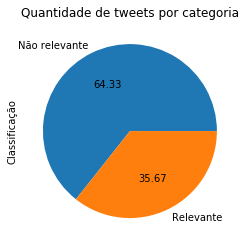

In [96]:

test_classificacao.plot(kind='pie', title='Quantidade de tweets por categoria', autopct="%.2f")

___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

 A marca escolhida para o classificador Naive-Bayes foi a Xiaomi, empresa chinesa de eletrônicos que divide opiniões a respeito da qualidade e da aceitabilidade dos seus produtos no mercado brasileiro. 

Consideramos como relevantes todos aqueles tweets que expressavam opiniões dos usuários e consumidores sobre os produtos da marca, tanto positivos como negativos. Assim, podemos selecionar os tweets que podem apontar a situação atual da marca, e também os problemas e acertos nos produtos comercializados nacionalmente.

Como estamos obtendo nossas informações do Twitter, decidimos considerar como não relevantes os tweets que não expressavam nenhum tipo de opinião, ou aqueles que eram a respeito de sorteios e premiações, algo bem comum dentro dessa plataforma.

### Função de limpeza dos tweets:

In [97]:
import re
#import nltk
#nltk.download()
#stop_words = stopwords.words("english")
# A ideia de remover as 'stop words' é retirar as palavras que não tem conrtribuição de significado para o texto.

def cleanup(tweet_og):
    #tweet = ' '.join([word for word in tweet_og.split(' ') if word not in stop_words]) # Remove as 'stop word'
    tweet = re.sub("https*\S+", " ", tweet_og) # Remove as URL
    tweet = re.sub('\s{2,}', " ", tweet_og) # Remove espaços múltiplos
    tweet = re.sub("#\S+", " ", tweet_og) # Remove Hashtags
    tweet = " ".join(re.findall("(\w+|[^\w ]+)",tweet_og)) # Adiciona espaços entre os Emojis
    tweet = re.sub("@\S+", " ", tweet_og) # Remove menções de usuários
    tweet = re.sub(re.compile("""][!-',.:)("?;#@"""), '', tweet_og) # Remove as pontuações
    tweet = re.sub('\n','',tweet_og) #Remove '\n'
    tweet = re.sub('rt','',tweet_og) #Remove os 'rt'
    tweet = word_tokenize(tweet_og) # Remove caracteres múltiplos
    tweet = tweet_og.lower() # Transforma o texto em letras minúsculas
    return tweet


In [98]:
import re 

def cleanup(frase_suja):
    frase_limpa = re.sub(r'http\S+', '', frase_suja, flags=re.MULTILINE) #Removendo Links no Tweet
    frase_limpa = " ".join(re.findall("(\w+|[^\w ]+)",frase_limpa)) #Adiciona espaços entre os emojis
    frase_limpa = re.sub('\s*([@])\s*', r' \1', frase_limpa) #Juntando @ anteriormente separados
    frase_limpa = re.sub(re.compile("""[!-',.:)"(?;#@]"""), '', frase_limpa) #Removendo pontuações e sinais
    frase_limpa = re.sub('rt','',frase_limpa) #Removendo 'rt'
    frase_limpa = re.sub('(\s+)',' ',frase_limpa) #Removendo multiplos espaços
    frase_limpa = re.sub('\n','',frase_limpa) #Removendo '\n' CASO o algum tweet ainda possua
    frase_limpa = frase_limpa.lower() #Deixando todas as letras em minúsculo
    
    return frase_limpa

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [99]:
import numpy as np

from collections import defaultdict


In [100]:


 class NaiveBayesModel:

    def dictIncrement(self, string_tweet, dict_index):
        str_array = str_array[0]

       # Cria um dicionário que acrescenta a quantidade de vezes que uma dada palvara aparece em cada classificação
        for palavra in string_tweet.split():
            self._classes_dict[dict_index][palavra] += 1

    def fit(self, X, y):
        self.training = X
        self.y = y # Ou sem o self
        self._classes = np.unique(y) # Lista das categorias
        self._classes_dict = np.array([defaultdict(lambda: 0) for i in range(self._classes.shape[0])])
        n_classes = len(self._classes) # Número de categorias

        for i, classificacao in enumerate(self._classes):
            unica_classificacao = self.training[self.y == classificacao]
            unica_classificacao_limpa = [cleanup(i) for i in unica_classificacao]
            unica_classificacao_limpa = pd.DataFrame(data=unica_classificacao_limpa)#

            np.apply_along_axis(self.dictIncrement, 1, unica_classificacao_limpa, i)#

        P_classificacao = np.empty(self.y.shape[0])
        todas_palavras = []
        palavras_p_classificacao = np.empty(self.y.shape[0])#

        for i, classificacao in enumerate(self.y):
            P_classificacao[i] = np.sum(self.y==classificacao)/float(self.y.shape[0])
            palavras_p_classificacao[i] = np.sum(np.array(list(self._classes_dict[i].values())))
            todas_palavras += self._classes_dict[i].keys()
        self.todas_palavras_s_repeticao = np.unique(np.array(todas_palavras))
        self.tamanho_todas_palavras_s_repeticao = self.todas_palavras_s_repeticao.shape[0]

        denominador = np.array([palavras_p_classificao[i] + self.tamanho_todas_palavras_s_repeticao for i, clssificacao in enumerate(self.y)])

        self.lista_categorias = [(self._classes_dict[i], P_classificacao[i], denominador[i]) for i, classificacao in enumerate(self.y)]
        self.lista_categorias = np.array(self.lista_categorias)

    def predictStrForEachClassification(self, frase):
        P_palavra = np.zeros(self.y.shape[0])
        for i, classificacao in enumerate(self.y):
            frase = cleanup(frase)
            for test_token in phrase.split():
                test_token_counts = self.lista_categorias[i][0].get(test_token, 0)+1
                P_palavra = test_token_counts/float(self,lista_categorias[i][2])

                P_palavras[i] += np.log(P_palavra)

        P_frase = np.empty(self.y.shape[0])
        for i, classificacao in enumerate(self.y):
            P_frase[i] = P_palavras[i] + np.log(self._lista_palavras[i][1])
        return P_frase

    def predict(self, teste):
        predicoes = []
        for string_teste in teste:
            P_frase = self.predictStrForEachClassification(string_test)
            predicoes.append(self.y[np.argmax(P_frase)])
        return np.array(predicoes)

In [101]:
train['Classificação'].astype(float)

ValueError: could not convert string to float: 'Relevante'

In [102]:
class NaiveBayesModel:
        
    def dictIncrement(self,str_array,dict_index):
        str_array=str_array[0]
            
        for single_word in str_array.split():
            #Adiciona quantidade de vezes que a palavra aparece por classificação no dicionário
            self.classifications_dicts[dict_index][single_word] += 1
                  
    def fit(self,dataset,labels):
        self.training_strs=dataset #Strings com os tweets
        self.labels=labels #Strings com as classificações
        self.classifications=np.unique(labels) #Lista com classificações
        self.classifications_dicts=np.array([defaultdict(lambda: 0) for i in range(self.classifications.shape[0])]) #Lista de dicionários por classificação

        if not isinstance(self.training_strs,np.ndarray): # Redundância caso não cheguem arrays 
            self.training_strs=np.array(self.training_strs)
            
        if not isinstance(self.labels,np.ndarray): # Redundância caso não cheguem arrays 
            self.labels=np.array(self.labels)
            
        for i,classification in enumerate(self.classifications): 
            unique_class_array=self.training_strs[self.labels==classification] # Pega cada frase por classificação           
            unique_class_array_cleaned=[cleanup(i) for i in unique_class_array] #Limpa cada frase
            unique_class_array_cleaned=pd.DataFrame(data=unique_class_array_cleaned) # Cria um DF organizado por classificação
            
            np.apply_along_axis(self.dictIncrement,1,unique_class_array_cleaned,i) # Função dictIncrement         
        
        classification_prob=np.empty(self.classifications.shape[0]) # P(C)
        all_words=[]
        clas_word_counts=np.empty(self.classifications.shape[0]) # Total de Palavras por Classificação

        for i,classification in enumerate(self.classifications):
            classification_prob[i]=np.sum(self.labels==classification)/float(self.labels.shape[0]) # P(C)=(N° C)/Total de Classificações
            clas_word_counts[i]=np.sum(np.array(list(self.classifications_dicts[i].values()))) # nº Palavras/classificação
            # Palavras/Classificação                          
            all_words+=self.classifications_dicts[i].keys()   
            
        # Lista de todas as palavras sem repetição        
        self.vocaburary=np.unique(np.array(all_words))
        # Total de palavras sem repetição
        self.vocaburary_size=self.vocaburary.shape[0]
        
        # Calculando o denominador fixo para cada classificação                                    
        denominator=np.array([clas_word_counts[i]+self.vocaburary_size for i,classification in enumerate(self.classifications)])

        # [Dict with words({word:word_count}),Classification probability, denominator value]
        self.category_array=[(self.classifications_dicts[i],classification_prob[i],denominator[i]) for i,c in enumerate(self.classifications)]                               
        self.category_array=np.array(self.category_array)
        
    def predictStrForEachClassification(self,phrase):                                                                                                                
        words_prop=np.zeros(self.classifications.shape[0]) # Guardar a probabilidade para cada frase
        
        # probabilidade de encontrar para cada classificação
        for i,classification in enumerate(self.classifications): 
            phrase=cleanup(phrase)
            for test_token in phrase.split(): #divide a frase por palavra                     
                
                #Numerador                     
                test_token_counts=self.category_array[i][0].get(test_token,0)+1
                
                #Probabilidade para a palavra                          
                word_prob=test_token_counts/float(self.category_array[i][2])  
                
                #Estamos usando o Log para evitar valores negativos e otimizar o processo
                words_prop[i]+=np.log(word_prob)
                                              
        phrase_prop=np.empty(self.classifications.shape[0])
        for i,classification in enumerate(self.classifications):
            phrase_prop[i]=words_prop[i]+np.log(self.category_array[i][1])                                  
      
        return phrase_prop
    
    def predict(self,test_set): 
        predictions=[] 
        for test_str in test_set:                                               
            phrase_prop=self.predictStrForEachClassification(test_str) 
            predictions.append(self.classifications[np.argmax(phrase_prop)])
        return np.array(predictions)

In [103]:
train_data = train['Treinamento']
train_labels = train['Classificação']

nb = NaiveBayesModel()

nb.fit(train_data,train_labels)



TypeError: '<' not supported between instances of 'float' and 'str'

In [74]:
test_data = test['Teste']
test_labels = test['Classificação']

novas_classificacoes = nb.predict(test_data)



AttributeError: 'NaiveBayesModel' object has no attribute 'classifications'

In [65]:
test['Predição'] = novas_classificacoes
test.head()

NameError: name 'novas_classificacoes' is not defined

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

___
### Concluindo

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

[Cleaning Text Data with Python](https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76) **Cleanup Text Function**